In [153]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [177]:
out = pd.read_csv(r'data/output_clean.csv')
out["target"] = [1 if x=="Suicide" else 0 for x in out["suicide"]]

In [178]:
print("Find features that affect suicide")
print("Divide the set into two groups for people who suicide and did not suicide")
print("Look if there happens to be a statistically significance between features")

Find features that affect suicide
Divide the set into two groups for people who suicide and did not suicide
Look if there happens to be a statistically significance between features


### Feature selection by comparing groups

In this section we are going to divide our data set into two groups and look if the futures between two groups are significantly different from each other. Afterwards we are going to visualize the coefficients to see if they allow us to seperate groups visually.

In [145]:
suicide = out[out["target"] == 1].describe()

In [146]:
non_suicide = out[out["target"] == 0].describe()

In [45]:
significance_score = 1.96
total_stdev = np.sqrt(suicide.loc["std",:]**2/38 + non_suicide.loc["std",:]**2/34)
mean_difference = suicide.loc["mean",:]- non_suicide.loc["mean",:]
z_score = abs(mean_difference/total_stdev)

In [55]:
print("the mean of the genes that are significantly different than each other are:")
selected_features = z_score[z_score>significance_score]

the mean of the genes that are significantly different than each other are:


In [363]:
plot_features = list(selected_features.sort_values(ascending=False)[:20].keys())

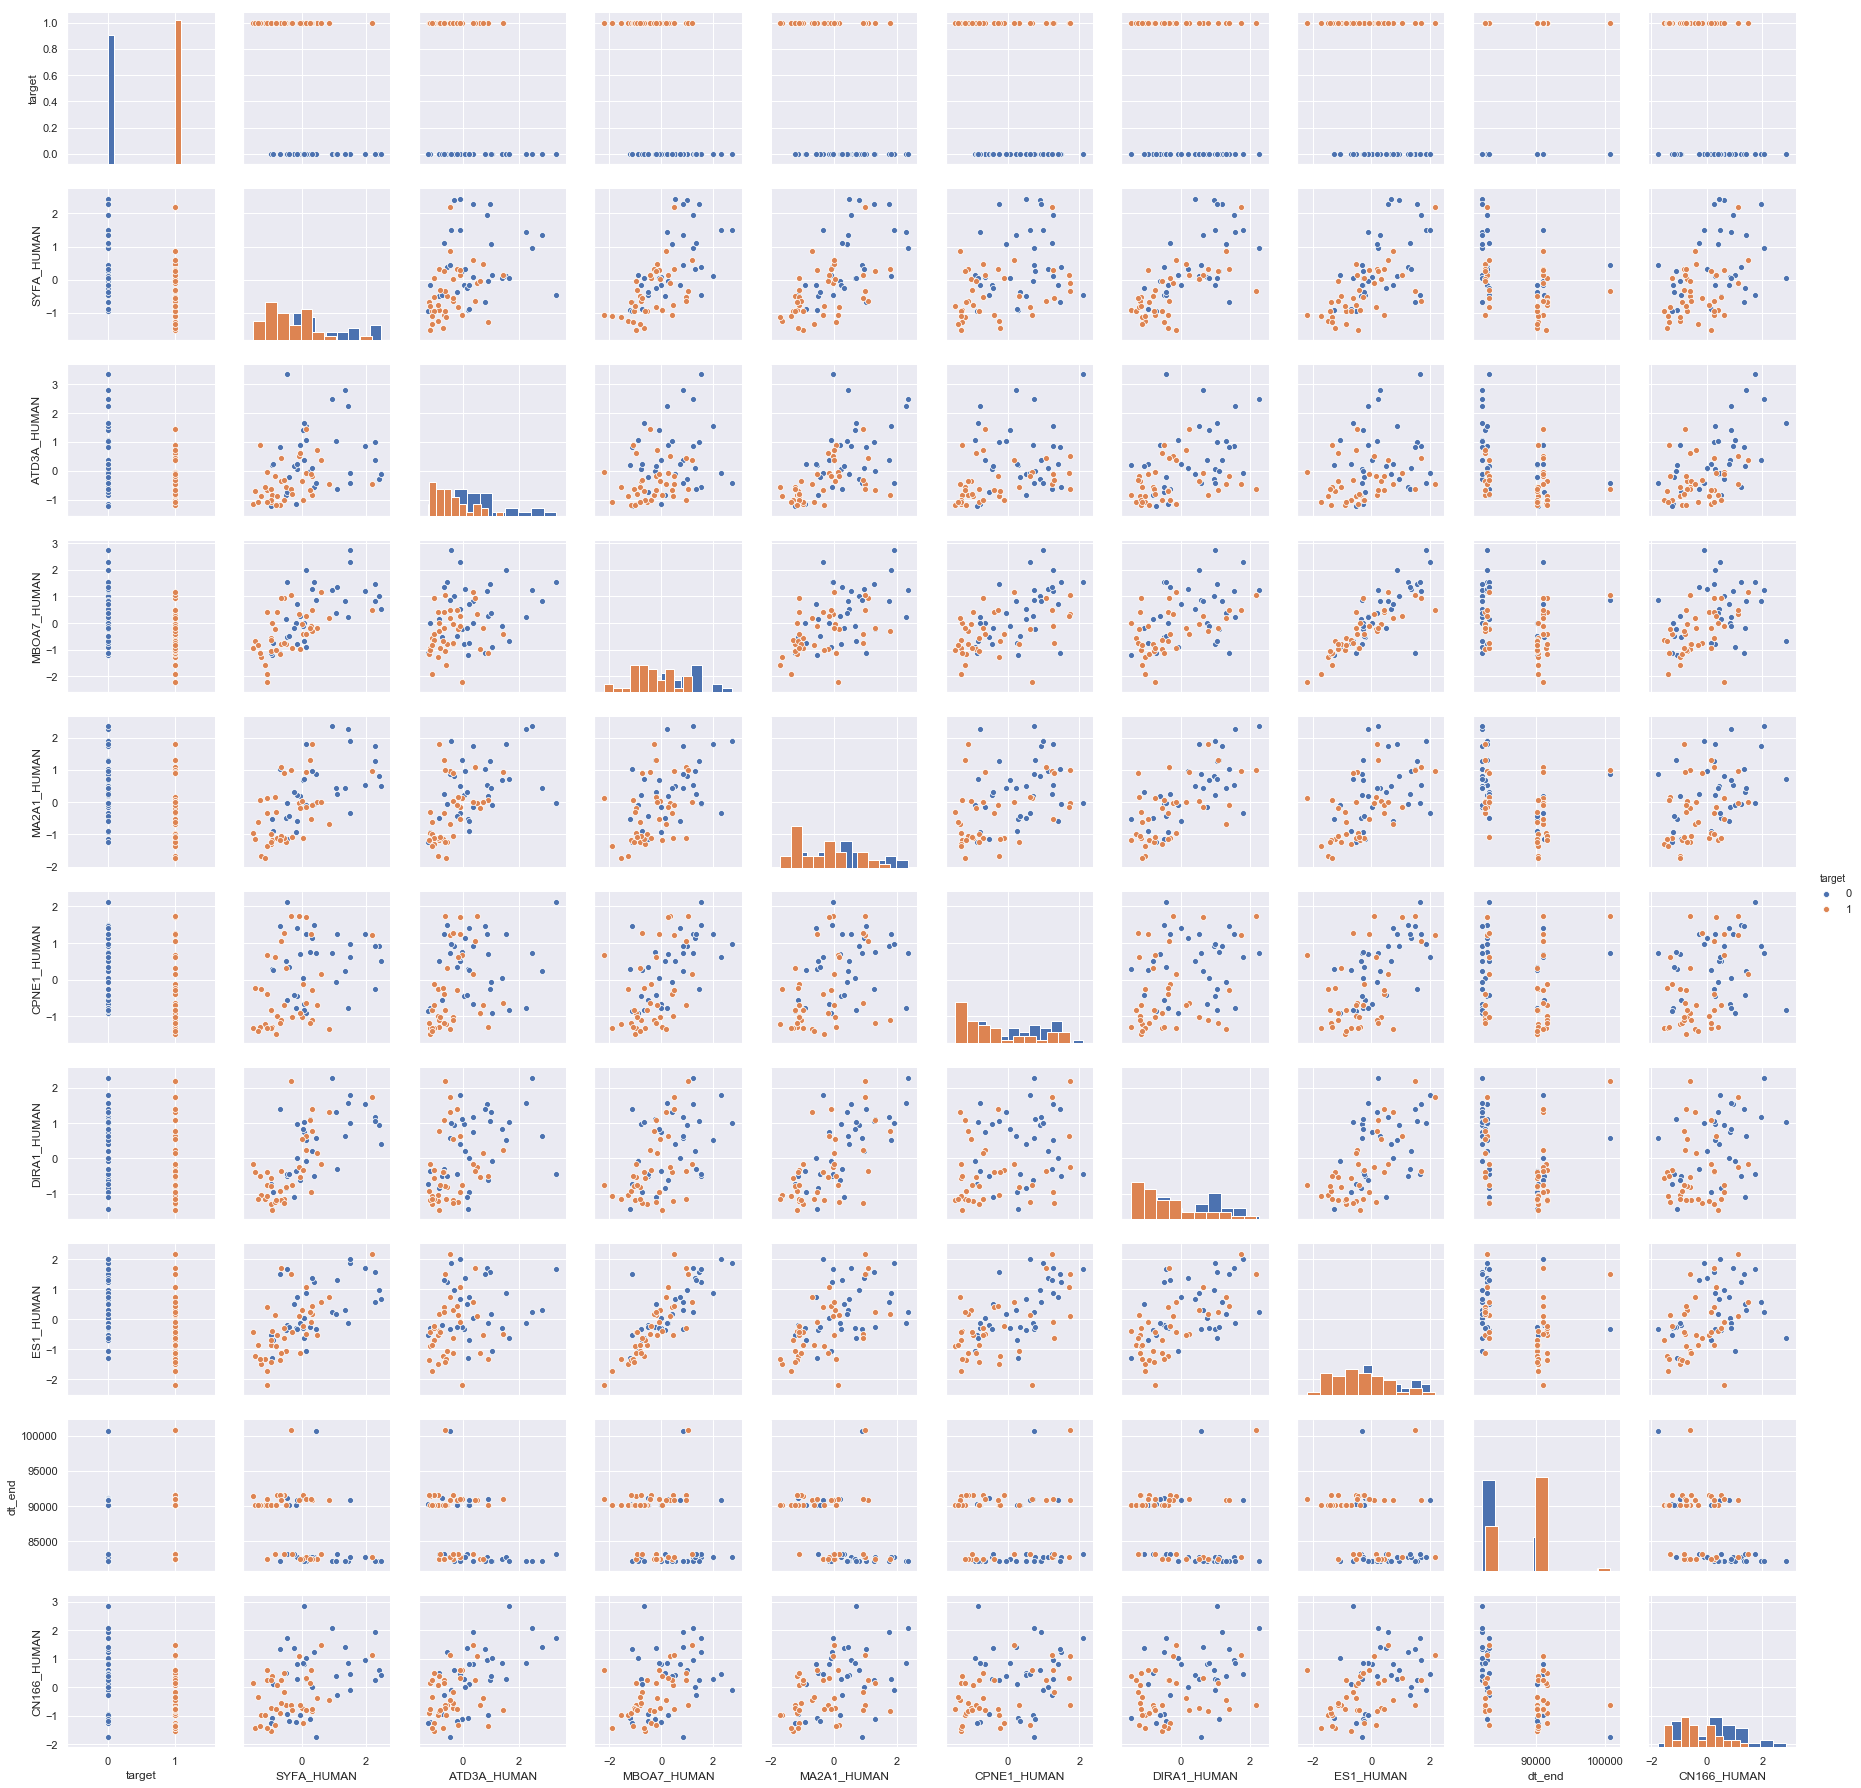

In [99]:
import seaborn as sns
sns.set(rc={'figure.figsize':(22.7,16.27)})
sns.pairplot(out[plot_features].dropna(), hue = 'target',diag_kind = 'hist')

### Naive Bayes

We have been able to achieve 0.73 percent accuracy to differentiate between groups using these features.

In [364]:
out1 = out[plot_features]
y = out1["target"]
X = out1.drop(columns =["target"])

In [365]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


gnb = GaussianNB();
gnb = gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
gnb.score(X_test,y_test)

0.7333333333333333

In [366]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred),axis = 1)
cmat

array([[0.75      , 0.28571429],
       [0.25      , 0.71428571]])

In [367]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.7321428571428572

Because of the low data size the results are volatile thus, we will sample and look at expected prediction score and its variance.

In [368]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
scores = []

for i in range(1,1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


    gnb = GaussianNB();
    gnb = gnb.fit(X_train,y_train)
    y_pred = gnb.predict(X_test)
    scores.append(gnb.score(X_test,y_test))

In [369]:
print("the mean is", np.mean(scores),"the stdev is",np.std(scores)/np.sqrt(1000))

the mean is 0.7139806473139805 the stdev is 0.003186150527051273


In [370]:
print("the expected accuracy is between",0.7217884551217884 - 1.96*0.0031897964904868173, 0.7217884551217884 + 1.96*0.0031897964904868173)

the expected accuracy is between 0.7155364540004342 0.7280404562431425


### Network of proteins

In [406]:
corr = out.corr()

In [419]:
import networkx as nx
limit = 0.95
edges_list = []
for protein1 in corr.keys():
    for protein2 in corr[protein1][corr[protein1] >= limit].keys():
        if protein1!=protein2:
            edges_list.append((protein1,protein2))

In [420]:
G = nx.DiGraph()

G.add_edges_from(edges_list)

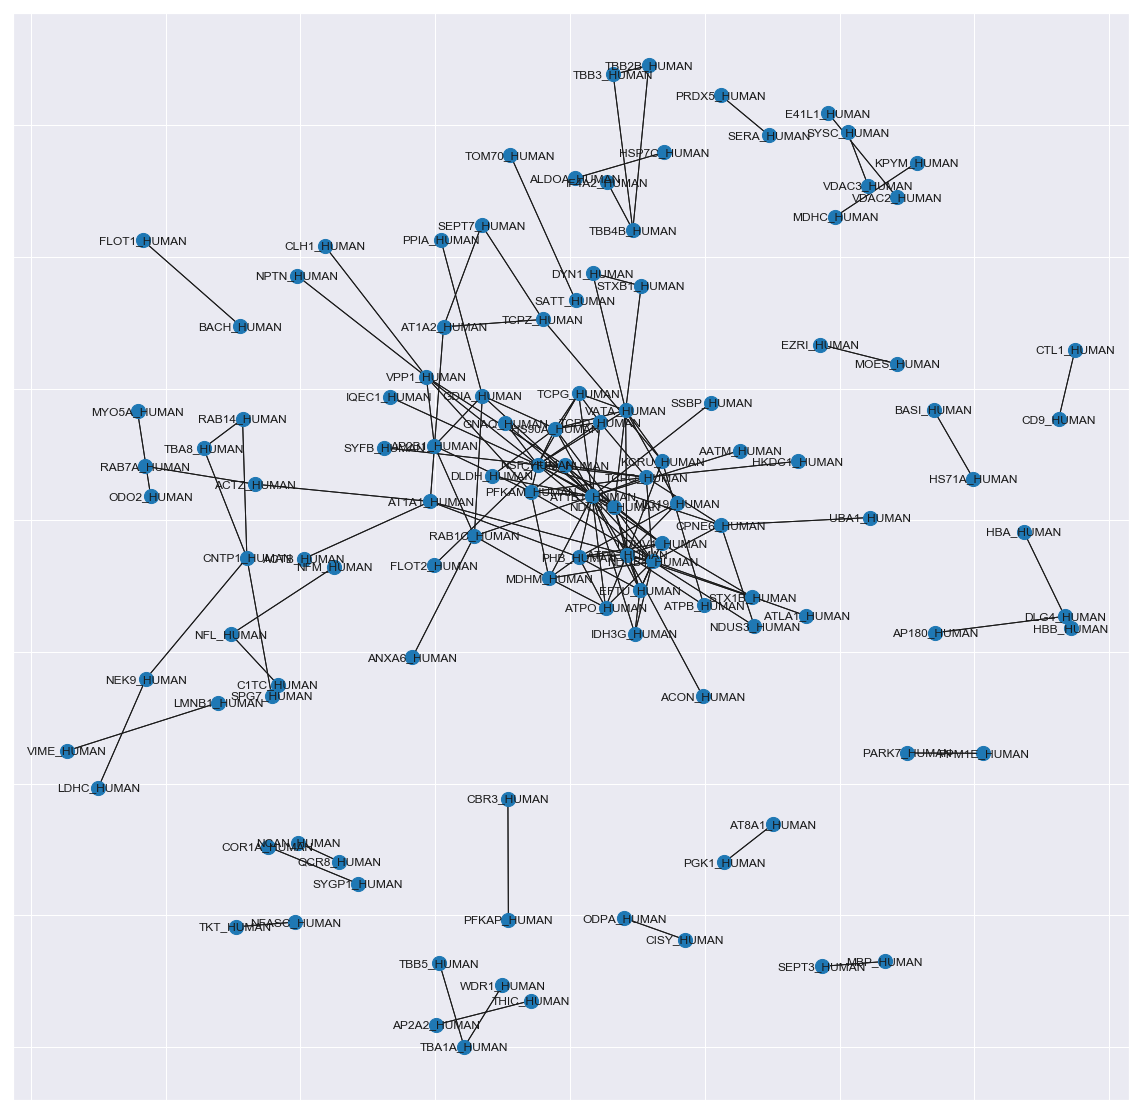

In [421]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
pos = nx.spring_layout(G,k=0.15,iterations=20)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 200)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=False)
plt.show()

### Similarity graph between people who suicide

In [429]:
corr = out1.drop(columns = ["dt_end", "target"]).T.corr()

In [430]:
import networkx as nx
limit = 0.7
edges_list = []
for protein1 in corr.keys():
    for protein2 in corr[protein1][corr[protein1] >= limit].keys():
        if protein1!=protein2:
            edges_list.append((protein1,protein2))

Green are suicide blue are non suicide

In [431]:
G = nx.DiGraph()

G.add_edges_from(edges_list)

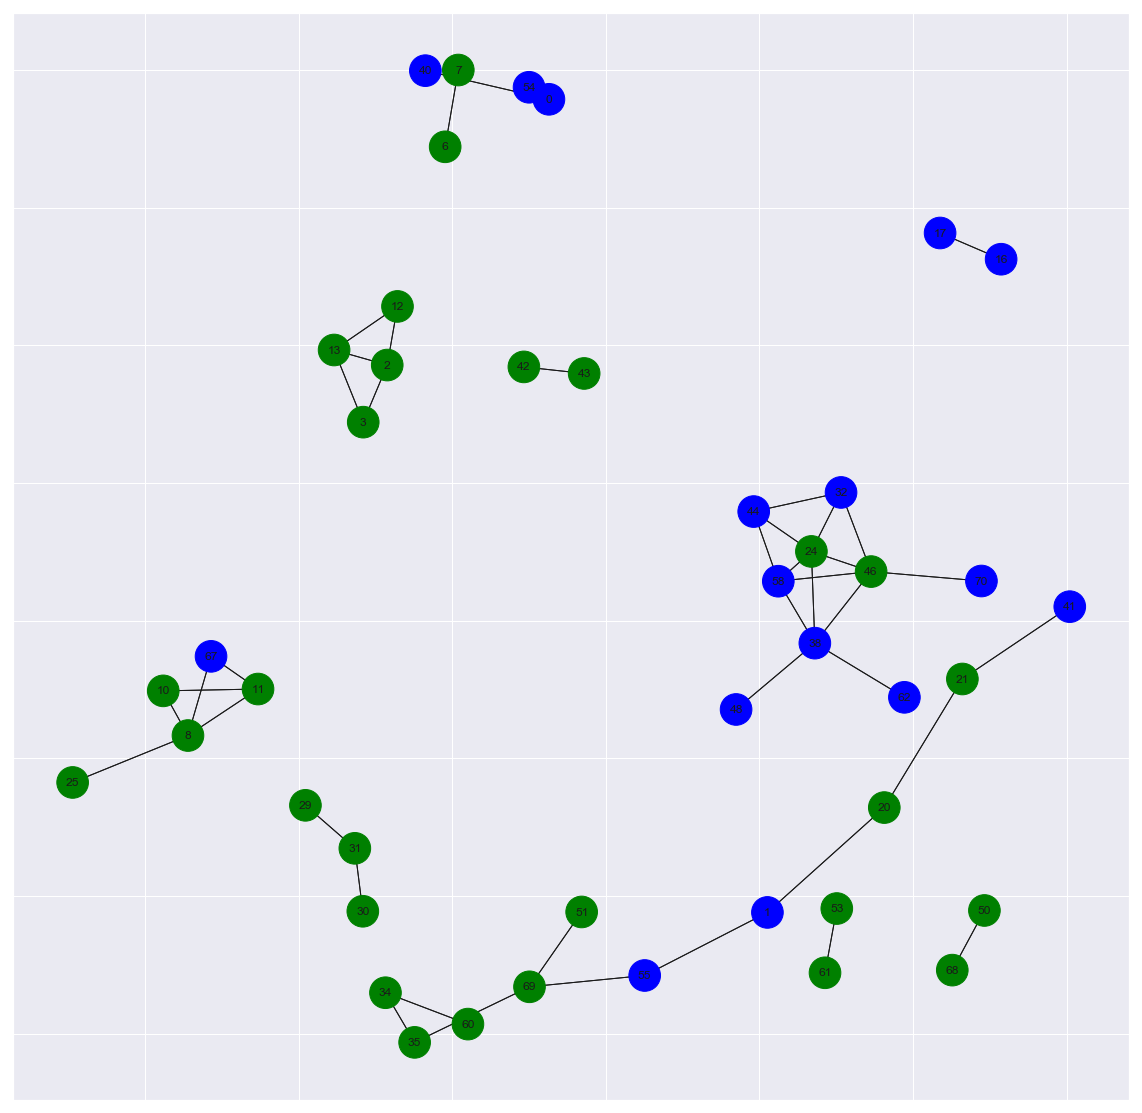

In [460]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))

val_map = dict(out["target"])


color_map = []
for node in G:
    if val_map[node] == 0:
        color_map.append('blue')
    else: color_map.append('green')

pos = nx.spring_layout(G,k=0.15,iterations=20)
nx.draw_networkx_nodes(G, pos, node_color = color_map,cmap=plt.get_cmap('jet'), node_size = 1000)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=False)
plt.show()

In [461]:
out

,1433B_HUMAN,1433E_HUMAN,1433F_HUMAN,1433G_HUMAN,1433S_HUMAN,1433T_HUMAN,1433Z_HUMAN,2AAA_HUMAN,2ABA_HUMAN,2ABD_HUMAN,...,ZNF76_HUMAN,dt_start,dt_end,dose,group,age,sex,gr,suicide,target
0,-0.482358,-0.377167,0.408312,0.114755,-0.221734,-0.094979,-0.594402,-0.062665,0.075711,0.012887,...,-0.233866,80515,82115,2,c,66,Male,C,Non-Suic,0
1,0.096314,-0.390258,-0.416978,0.361850,0.423957,0.183221,-0.161553,0.100186,0.614246,0.547567,...,0.029326,80515,83115,4,c,66,Male,C,Non-Suic,0
2,-0.127514,-0.350314,-0.907252,-0.798618,0.550538,-0.218804,-0.341688,-0.062510,-0.507460,-0.004003,...,-0.748341,80515,90215,5,a,31,Female,MDD*SSRI,Suicide,1
3,-0.152157,-0.371558,-0.563748,-0.657674,0.321579,0.207347,-0.543700,-0.262971,-0.448623,-0.738267,...,-0.128839,80515,91515,5,a,31,Female,MDD*SSRI,Suicide,1
4,-1.060055,-0.727050,-0.939338,-0.886080,-1.450801,-0.603545,-1.155046,-0.872522,-1.008205,-0.419715,...,-0.137329,80515,82115,2,c,25,Male,C,Non-Suic,0
5,-0.340052,-0.435457,-0.667527,-0.438919,-0.533545,-0.362459,-0.679576,-0.480987,-0.570438,-0.614974,...,-1.153174,80515,90115,6,c,25,Male,C,Non-Suic,0
6,-0.246264,-0.338165,0.389353,-0.760521,-0.234935,0.587108,-0.190841,-0.201312,-0.826205,-0.042508,...,-1.424414,80515,82515,2,a,28,Female,MDD*SSRI,Suicide,1
7,-0.935748,-0.728331,-0.586699,-1.367377,-0.424990,-0.401050,-0.816313,-0.979758,-1.185020,-1.270994,...,-1.066993,80515,91415,2,a,28,Female,MDD*SSRI,Suicide,1
8,0.097305,0.130650,-1.183451,-0.666174,-0.133851,-0.097101,0.243134,-0.474918,-0.170638,-0.399275,...,-0.136639,80515,90215,8,a,31,Male,MDD*SSRI,Suicide,1
9,-1.260911,-0.693899,-0.883422,-1.368191,-0.393000,0.482948,0.039665,-0.534810,0.392789,0.893887,...,0.217265,80515,91015,8,a,31,Male,MDD*SSRI,Suicide,1
